In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10,8)

# Criar o DataSet

In [7]:
def get_linear_curve(x, w, b = 0, noise_scale=0):
    return w*x + b + noise_scale*np.random.randn(x.shape[0])

In [11]:
x = np.arange(-10, 30.1, 0.5)
Y = get_linear_curve(x, 1.8, 32, noise_scale=2.5)

In [12]:
Y.shape, x.shape

((81,), (81,))

Text(0, 0.5, 'ºF')

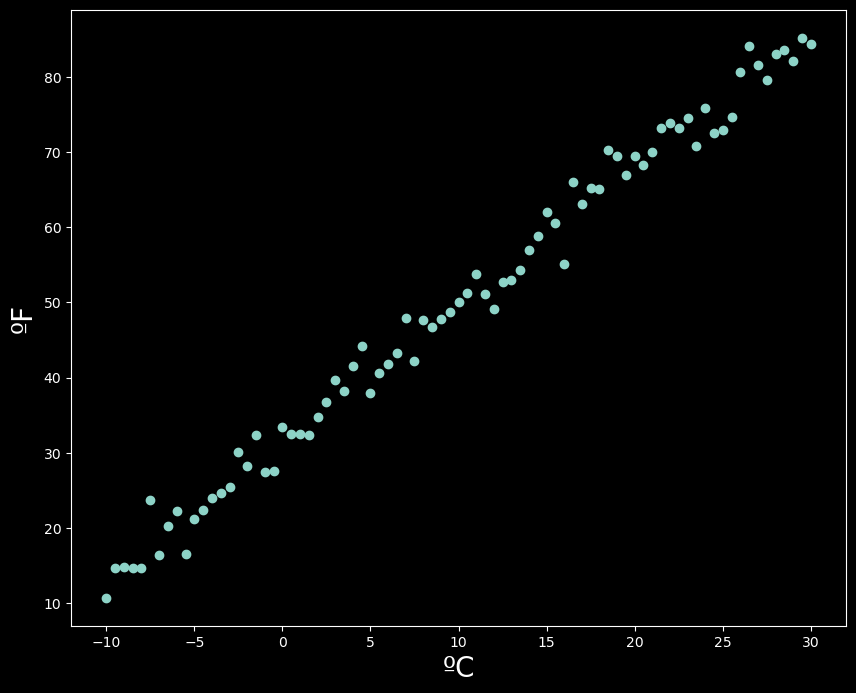

In [13]:
plt.scatter(x, Y)
plt.xlabel('ºC', fontsize=20)
plt.ylabel('ºF', fontsize=20)

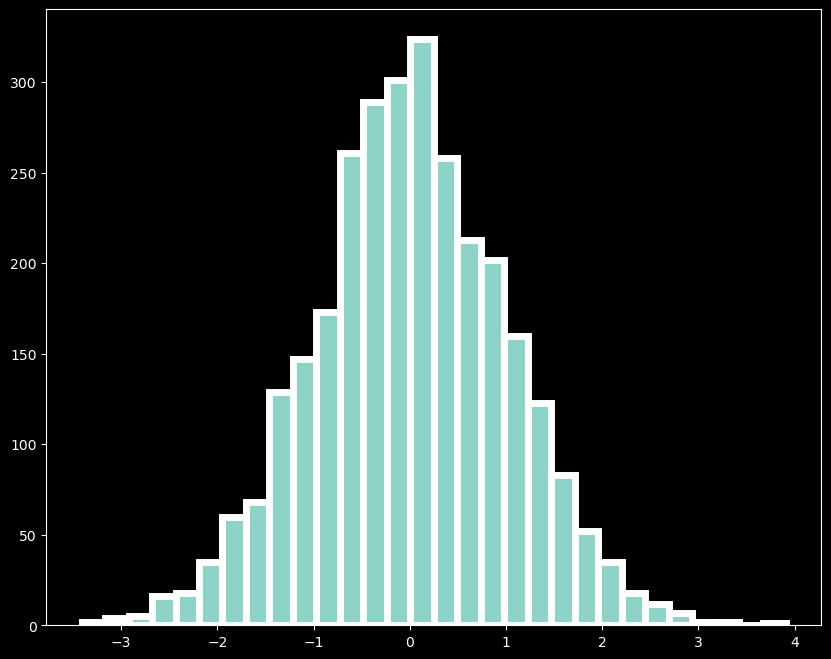

In [15]:
plt.hist(np.random.randn(3000), bins=30, edgecolor='white', linewidth=5);

# Modelo de IA

- Inicializar os pesos e bias 
- Feedforward
- Calcular a perda
- Backpropagation

In [16]:
# Inicializar
w = np.random.rand(1)
b = 0

In [17]:
# Feedforward
def forward(inputs, w, b):
    return w*inputs + b

In [18]:
# Função de perda
def mse(Y, y):
    return (Y - y)**2

In [20]:
v = np.array([3, 4, 5])
u = np.array([3.2, 4.5, 4.8])

mse(v, u).mean()

0.11000000000000006

# Backpropagation

In [38]:
def backpropagation(inputs, outputs, targets, w, b, lr):
    dw  = lr*(-2*inputs*(targets-outputs)).mean()
    db = lr*(-2*(targets-outputs)).mean()
    
    w -= dw
    b -= db
    
    return w, b

In [45]:
def model_fit(inputs, targets, w, b, epochs = 200, lr = 0.001):
    for epoch in range(epochs):
        outputs = forward(inputs, w, b)
        loss = np.mean(mse(targets, outputs))
        w, b = backpropagation(inputs, outputs, targets, w, b, lr)
        
        if (epoch+1) % (epochs/10) == 0:
            print(f'Epoch: [{epoch+1}/{epochs}] Loss: [{loss:.4f}]')
        
    return w, b

In [46]:
# Inicializar novamente
w = np.random.randn(1)
b = np.zeros(1)

In [53]:
w, b = model_fit(x, Y, w, b, epochs=500, lr=0.001)
print(f'w: {w[0]:.3f}, b: {b[0]:.3f}')

Epoch: [50/500] Loss: [5.9312]
Epoch: [100/500] Loss: [5.8768]
Epoch: [150/500] Loss: [5.8282]
Epoch: [200/500] Loss: [5.7850]
Epoch: [250/500] Loss: [5.7465]
Epoch: [300/500] Loss: [5.7121]
Epoch: [350/500] Loss: [5.6816]
Epoch: [400/500] Loss: [5.6543]
Epoch: [450/500] Loss: [5.6300]
Epoch: [500/500] Loss: [5.6084]
w: 1.849, b: 30.955


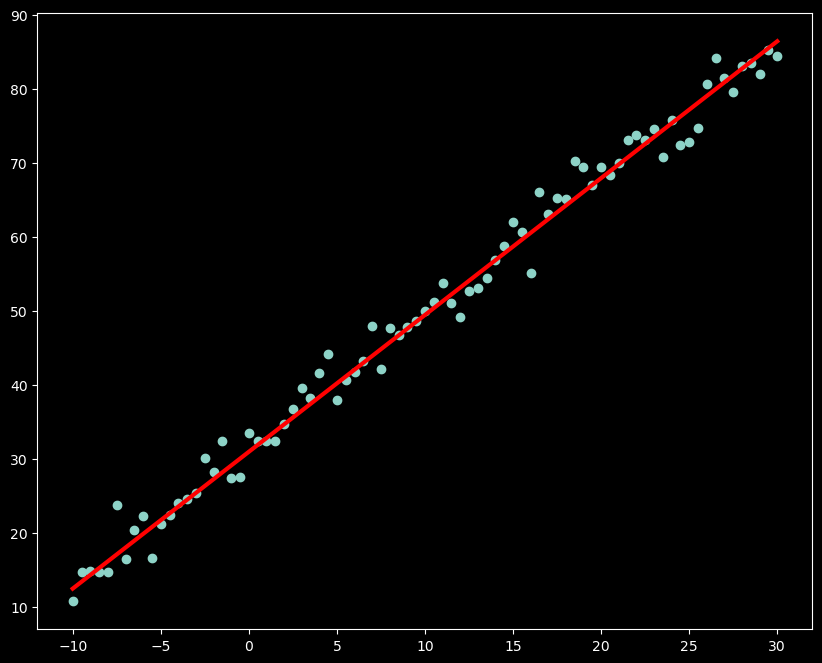

In [55]:
plt.scatter(x, Y)
plt.plot(x, get_linear_curve(x, w, b), 'r', lw=3)